In [1]:
import os
import imgaug
from skimage import io, transform
from skimage import img_as_ubyte
from imgaug import augmenters as iaa
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
import random

# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In C:\Users\Flayiva_01\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Flayiva_01\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Flayiva_01\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
%matplotlib inline

In [3]:
# images = np.random.randint(0, 255, (16, 128, 128, 3), dtype=np.uint8)
SAMPLE_PATH = "data/Test/001.bmp"
TXT_PATH = "data/Test/labels/001.txt"

In [4]:
img = img_as_ubyte(io.imread(SAMPLE_PATH, as_gray=True))
img.shape

(2400, 1935)

In [5]:
x,y = img.shape

In [6]:
SCALE = 15

In [7]:
img_dimmed = np.expand_dims(img, axis=0)

In [8]:
img_dimmed

array([[[252, 252, 253, ..., 253, 253,   0],
        [252, 252, 252, ..., 253, 253,   0],
        [252, 252, 252, ..., 253, 253,   0],
        ...,
        [252, 252, 252, ..., 134, 148,   0],
        [254, 254, 254, ..., 140, 136,  10],
        [  0,   0,   0, ...,   3,   1,   0]]], dtype=uint8)

In [9]:
def extract_labels_from_txt(path):
    with open(path, "r") as f:
        # only first 19 are actual coords in dataset label files
        coords_raw = f.readlines()[:19]
        coords_raw = [tuple([int(float(s)) for s in t.split(",")]) for t in coords_raw]
        return coords_raw

In [10]:
coords_raw = extract_labels_from_txt(TXT_PATH)

In [11]:
coords_raw

[(835, 996),
 (1473, 1029),
 (1289, 1279),
 (604, 1228),
 (1375, 1654),
 (1386, 2019),
 (1333, 2200),
 (1263, 2272),
 (1305, 2252),
 (694, 1805),
 (1460, 1870),
 (1450, 1864),
 (1588, 1753),
 (1569, 2013),
 (1514, 1620),
 (1382, 2310),
 (944, 1506),
 (1436, 1569),
 (664, 1340)]

In [12]:
kp_to_list = lambda k_arr: [(p.x, p.y) for p in k_arr]

In [13]:
def list_to_kp(coords_raw):
    kp = []
    for coord in coords_raw:
        kp.append(imgaug.Keypoint(x=coord[0], y=coord[1]))
    keypoints = imgaug.KeypointsOnImage(kp, shape=img.shape)
    return keypoints

In [14]:
keypoints_on_images = [list_to_kp(coords_raw)]

In [15]:
keypoints_on_images

[KeypointsOnImage([Keypoint(x=835.00000000, y=996.00000000), Keypoint(x=1473.00000000, y=1029.00000000), Keypoint(x=1289.00000000, y=1279.00000000), Keypoint(x=604.00000000, y=1228.00000000), Keypoint(x=1375.00000000, y=1654.00000000), Keypoint(x=1386.00000000, y=2019.00000000), Keypoint(x=1333.00000000, y=2200.00000000), Keypoint(x=1263.00000000, y=2272.00000000), Keypoint(x=1305.00000000, y=2252.00000000), Keypoint(x=694.00000000, y=1805.00000000), Keypoint(x=1460.00000000, y=1870.00000000), Keypoint(x=1450.00000000, y=1864.00000000), Keypoint(x=1588.00000000, y=1753.00000000), Keypoint(x=1569.00000000, y=2013.00000000), Keypoint(x=1514.00000000, y=1620.00000000), Keypoint(x=1382.00000000, y=2310.00000000), Keypoint(x=944.00000000, y=1506.00000000), Keypoint(x=1436.00000000, y=1569.00000000), Keypoint(x=664.00000000, y=1340.00000000)], shape=(2400, 1935))]

In [16]:
rs = iaa.Sequential()
rs_det = rs.to_deterministic()
seq = iaa.Sequential([iaa.Affine(translate_px={"x": (200, 200)})])
seq_det = seq.to_deterministic() # call this for each batch again, NOT only once at the start

In [17]:
images_rs = rs_det.augment_images(img_dimmed)
keypoints_rs = rs_det.augment_keypoints(keypoints_on_images)
images_aug = seq_det.augment_images(images_rs)
keypoints_aug = seq_det.augment_keypoints(keypoints_rs)

In [18]:
keypoints_aug

[KeypointsOnImage([Keypoint(x=1035.00000000, y=996.00000000), Keypoint(x=1673.00000000, y=1029.00000000), Keypoint(x=1489.00000000, y=1279.00000000), Keypoint(x=804.00000000, y=1228.00000000), Keypoint(x=1575.00000000, y=1654.00000000), Keypoint(x=1586.00000000, y=2019.00000000), Keypoint(x=1533.00000000, y=2200.00000000), Keypoint(x=1463.00000000, y=2272.00000000), Keypoint(x=1505.00000000, y=2252.00000000), Keypoint(x=894.00000000, y=1805.00000000), Keypoint(x=1660.00000000, y=1870.00000000), Keypoint(x=1650.00000000, y=1864.00000000), Keypoint(x=1788.00000000, y=1753.00000000), Keypoint(x=1769.00000000, y=2013.00000000), Keypoint(x=1714.00000000, y=1620.00000000), Keypoint(x=1582.00000000, y=2310.00000000), Keypoint(x=1144.00000000, y=1506.00000000), Keypoint(x=1636.00000000, y=1569.00000000), Keypoint(x=864.00000000, y=1340.00000000)], shape=(2400, 1935))]

[(1035.0, 996.0), (1673.0, 1029.0), (1489.0, 1279.0), (804.0, 1228.0), (1575.0, 1654.0), (1586.0, 2019.0), (1533.0, 2200.0), (1463.0, 2272.0), (1505.0, 2252.0), (894.0, 1805.0), (1660.0, 1870.0), (1650.0, 1864.0), (1788.0, 1753.0), (1769.0, 2013.0), (1714.0, 1620.0), (1582.0, 2310.0), (1144.0, 1506.0), (1636.0, 1569.0), (864.0, 1340.0)]


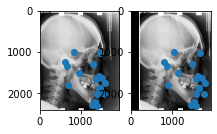

In [19]:
fig = plt.figure()

plt.rcParams["figure.figsize"] = [16,9]
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 1, 1)

ax1.imshow(images_rs[0], cmap="gray")
ax2.imshow(images_aug[0], cmap="gray")

k_orig = kp_to_list(keypoints_rs[0].keypoints)
k_aug = kp_to_list(keypoints_aug[0].keypoints)
print(k_aug)
ax1.scatter(*zip(*k_orig))
ax2.scatter(*zip(*k_aug))
plt.show()

In [20]:
ORIG_IMAGE_X = 1935
ORIG_IMAGE_Y = 2400
PIXELS_PER_MM = 10
N_LANDMARKS = 19

# (2400, 1935)

## Let's see how we can generate rotated images and save them with their corresponding annotations

In [103]:
BASE_PATH = "data/RawImage/TrainingData"
BASE_LABELS = "data/AnnotationsByMD/400_senior"

In [104]:
TEST_BASE_PATH = "data/Test"
TEST_BASE_LABELS = "data/Test"

In [105]:
def img_path_walker(base_path):
    # walk through subdirs to get all image paths
    img_paths = []
    for root, _, files in os.walk(base_path):
        for name in files:
            if name.endswith(".bmp"):
                img_paths.append(os.path.abspath(os.path.join(root, name)))
    return img_paths

In [106]:
def label_walker(base_labels):
    img_labels = {}
    for label_file in os.listdir(base_labels):
        linked_img = label_file[:-3] + "bmp"
        img_labels[linked_img] = extract_labels_from_txt(base_labels + "/" + label_file)
    return img_labels

In [107]:
img_labels = label_walker(BASE_LABELS)
img_paths = img_path_walker(BASE_PATH)

In [108]:
len(img_labels)

400

In [109]:
len(img_paths)

150

In [110]:

# shrink = iaa.Sequential(iaa.AdditiveGaussianNoise(scale=(30, 90)))
# augment_functions = [iaa.Fliplr(1.0)]


# augment_functions += [iaa.Affine(rotate=rot_angle) for rot_angle in [180]]

# print(augment_functions)

In [111]:
# shrink = iaa.Sequential([iaa.Scale({"height":256, "width":256})])
# shrink  = iaa.AdditiveGaussianNoise(scale=(30, 90))

# shrink = iaa.Sequential(iaa.AdditiveGaussianNoise(scale=(30, 90)))
# augment_functions = [iaa.Fliplr(1.0)]


# augment_functions += [iaa.Affine(rotate=rot_angle) for rot_angle in [90,180]]
# augment_functions += [iaa.Affine(rotate=90)]
# print(augment_functions)

In [125]:
# shrink = iaa.Scale({"height":224, "width":224})

# Papper and Salt
augment_functions = [iaa.SaltAndPepper(0.1)]

# 1px
# augment_functions = [iaa.Affine(translate_px={"y": (9)})]
# augment_functions += [iaa.Affine(translate_px={"y": (-9)})]
# augment_functions += [iaa.Affine(translate_px={"x": (7)})]
# augment_functions += [iaa.Affine(translate_px={"x": (-7)})]

# 2px
# augment_functions += [iaa.Affine(translate_px={"y": (18)})]
# augment_functions += [iaa.Affine(translate_px={"y": (-18)})]
# augment_functions += [iaa.Affine(translate_px={"x": (15)})]
# augment_functions += [iaa.Affine(translate_px={"x": (-15)})]

# 3px
# augment_functions += [iaa.Affine(translate_px={"y": (28)})]
# augment_functions += [iaa.Affine(translate_px={"y": (-28)})]
# augment_functions += [iaa.Affine(translate_px={"x": (21)})]
# augment_functions += [iaa.Affine(translate_px={"x": (-21)})]
# augment_functions += [iaa.Affine(rotate=rot_angle) for rot_angle in [180]]


In [126]:
def aug_and_save(img, img_name, label, aug_list, base_path):
    kp = [list_to_kp(label)]

#     img = shrink.augment_image(img)
#     kp = shrink.augment_keypoints(kp)
    
    print("**************************")
#     img_save_name = base_path + "/" + img_name + "_ps_aug0"
#     io.imsave(img_save_name + ".bmp", img)
#     with open(img_save_name + ".txt", "w") as lf:
#             stringified = [str(tup) for tup in kp_to_list(kp[0].keypoints)]
#             print("\n".join(stringified))
#             stringified = [s.replace("(", "").replace(")","") for s in stringified]
            
#             lf.write("\n".join(stringified))
    for i, aug in enumerate(aug_list):
        img_aug = aug.augment_image(img)
        kp_aug = aug.augment_keypoints(kp)
        # save img:
        img_save_name = base_path + "/" + img_name + "_ps_aug{}".format(i+1)
        io.imsave(img_save_name + ".bmp", img_aug)
        # save labelfile:
        with open(img_save_name + ".txt", "w") as lf:
            stringified = [str(tup) for tup in kp_to_list(kp_aug[0].keypoints)]
            stringified = [s.replace("(", "").replace(")","") for s in stringified]
            lf.write("\n".join(stringified))

In [127]:
for i, path in enumerate(img_paths):
    # import as ubyte if want reduced range for small pics
    # loop_img = img_as_ubyte(io.imread(path, as_grey=True))
    # import normally for resnet-18 attempt:
    loop_img = io.imread(path)
    print(loop_img.shape)
    
    loop_labels = img_labels[path.split("\\")[-1]]
    #print_image(loop_img, loop_labels)
#     aug_and_save(loop_img, path.split("\\")[-1][:-4], loop_labels, augment_functions, "data/Test/Results")
    aug_and_save(loop_img, path.split("\\")[-1][:-4], loop_labels, augment_functions, "data/images/noaug_ps/256/ps")


(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935, 3)
**************************
(2400, 1935

In [52]:
TXT_PATH = "data/images/256/final/001_aug1.txt"

In [306]:
coords_raw = extract_labels_from_txt(TXT_PATH)

In [307]:
coords_raw

[(-707, -868),
 (-1345, -901),
 (-1161, -1151),
 (-476, -1100),
 (-1247, -1526),
 (-1258, -1891),
 (-1205, -2072),
 (-1135, -2144),
 (-1177, -2124),
 (-566, -1677),
 (-1332, -1742),
 (-1322, -1736),
 (-1460, -1625),
 (-1441, -1885),
 (-1386, -1492),
 (-1254, -2182),
 (-816, -1378),
 (-1308, -1441),
 (-536, -1212)]